In [986]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
T.manual_seed(0)

In [987]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2, num_hidden3):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, num_hidden1)
        self.linear2 = nn.Linear(num_hidden1, num_hidden2)
        self.linear3 = nn.Linear(num_hidden2, num_hidden3)
        self.linear4 = nn.Linear(num_hidden3, 1)
        self.tan = nn.Tanh()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        layer1 = self.linear1(x)
        act1 = self.tan(layer1)
        layer2 = self.linear2(act1)
        act2 = self.tan(layer2)
        layer3 = self.linear3(act2)
        act3 = self.tan(layer3)
        layer4 = self.linear4(act3)
        out = self.sigmoid(layer4)
        return out

In [988]:
data = pd.read_csv('data.csv', header=None)
X = T.tensor(data.drop(2, axis=1).values, dtype=T.float)
y = T.tensor(data[2].values, dtype=T.float).view(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

criterion = nn.BCELoss()
model = NeuralNetwork(X.shape[1], 10,10,10)


Epoch 0, Accuracy: 0.5
Epoch 1, Accuracy: 0.5
Epoch 2, Accuracy: 0.5
Epoch 3, Accuracy: 0.5
Epoch 4, Accuracy: 0.5
Epoch 5, Accuracy: 0.5
Epoch 6, Accuracy: 0.5
Epoch 7, Accuracy: 0.5
Epoch 8, Accuracy: 0.5
Epoch 9, Accuracy: 0.5
Epoch 10, Accuracy: 0.5
Epoch 11, Accuracy: 0.5
Epoch 12, Accuracy: 0.5
Epoch 13, Accuracy: 0.5
Epoch 14, Accuracy: 0.5
Epoch 15, Accuracy: 0.5
Epoch 16, Accuracy: 0.5
Epoch 17, Accuracy: 0.5
Epoch 18, Accuracy: 0.5
Epoch 19, Accuracy: 0.5
Epoch 20, Accuracy: 0.5
Epoch 21, Accuracy: 0.5
Epoch 22, Accuracy: 0.5
Epoch 23, Accuracy: 0.5
Epoch 24, Accuracy: 0.5
Epoch 25, Accuracy: 0.5
Epoch 26, Accuracy: 0.5
Epoch 27, Accuracy: 0.5
Epoch 28, Accuracy: 0.5
Epoch 29, Accuracy: 0.5
Epoch 30, Accuracy: 0.5
Epoch 31, Accuracy: 0.5
Epoch 32, Accuracy: 0.5
Epoch 33, Accuracy: 0.5
Epoch 34, Accuracy: 0.5
Epoch 35, Accuracy: 0.5
Epoch 36, Accuracy: 0.5
Epoch 37, Accuracy: 0.5
Epoch 38, Accuracy: 0.5
Epoch 39, Accuracy: 0.5
Epoch 40, Accuracy: 0.550000011920929
Epoch 41, Ac

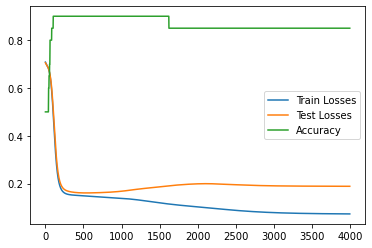

In [989]:
def torch_fit(X_train, X_test, y_train, y_test,model, criterion, lr, num_epochs):
    optimizer = T.optim.Adam(model.parameters(), lr)
    lsn = []
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        pred = model(X_train)
        loss_value = criterion(pred, y_train)
        train_losses.append(loss_value.item())
        #print(f'Epoch {epoch}, loss {loss_value.item():.2f}')
        loss_value.backward()
        optimizer.step()


    
        model.eval()
        with T.no_grad():

            test_preds = model(X_test)
            test_loss = criterion(test_preds, y_test)
            test_losses.append(test_loss.item())
        ls = []
        for i in test_preds:
            if i > 0.5:
                ls.append(1)
            else:
                ls.append(0)
           
        ls = T.tensor(ls).view(-1,1)
        sc = (ls == y_test).sum()/len(y_test)
        lsn.append(sc.item())

        print(f'Epoch {epoch}, Accuracy: {sc}')
        

        model.train()
            
               
    
    #acc = tsp / y_test
    #print(len(tsp))
    #print(acc)
    #print(type(y_test))
    plt.plot(train_losses, label = 'Train Losses')
    #plt.show()
    plt.plot(test_losses, label = 'Test Losses')
    plt.plot(lsn,label = 'Accuracy')
    plt.legend()
    plt.show()
        
model = torch_fit(X_train=X_train, X_test=X_test,y_train=y_train, y_test=y_test, model=model, criterion=criterion, lr=0.001, num_epochs=4000 )

In [990]:
dropout = nn.Dropout()
dropout.train()
print(dropout(X))
dropout.eval()
print(dropout(X))

tensor([[ 1.5610, -0.1273],
        [ 0.5755,  0.5828],
        [ 0.0000,  0.0000],
        [ 0.5846,  0.8434],
        [ 1.0184,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.5505,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.8597],
        [ 0.0000,  0.4997],
        [ 0.0169,  0.2732],
        [ 0.0000,  0.0000],
        [ 0.5129,  0.8525],
        [ 0.0000,  0.0000],
        [ 0.8909,  0.9023],
        [ 0.0000,  0.4024],
        [ 0.0000,  0.0000],
        [ 0.6170,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.6589,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.6212,  1.0140],
        [ 0.0000,  0.9077],
        [ 0.0000,  0.6411],
        [ 1.3981,  0.7461],
        [ 0.0000,  1.3930],
        [ 0.3020,  0.0000],
        [ 0.3285,  0.5552],
        [ 0.6652,  0.1119],
        [ 0.0000,  0.5727],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0703],
        [ 0.4259,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0

In [991]:
ytest = T.randint(0,2,(100,))
preds = T.rand(100)
preds

tensor([0.0985, 0.8947, 0.7705, 0.9691, 0.9006, 0.0535, 0.1588, 0.4192, 0.1753,
        0.8472, 0.1220, 0.2560, 0.0170, 0.2161, 0.9112, 0.9094, 0.8579, 0.8861,
        0.9446, 0.3720, 0.7200, 0.9455, 0.6654, 0.9998, 0.7593, 0.8108, 0.3250,
        0.7399, 0.5575, 0.3806, 0.2181, 0.2194, 0.1153, 0.8357, 0.8555, 0.4431,
        0.2107, 0.8865, 0.8197, 0.5372, 0.2639, 0.9595, 0.7045, 0.1204, 0.9785,
        0.8797, 0.3178, 0.7811, 0.2159, 0.4216, 0.9246, 0.5207, 0.1464, 0.3329,
        0.3643, 0.4035, 0.5479, 0.9624, 0.5268, 0.1913, 0.5256, 0.7397, 0.7480,
        0.0430, 0.4105, 0.1284, 0.2867, 0.6801, 0.1449, 0.6859, 0.9244, 0.5328,
        0.1668, 0.3209, 0.6092, 0.1188, 0.7484, 0.0461, 0.0194, 0.0142, 0.3986,
        0.8362, 0.0268, 0.9156, 0.3000, 0.6464, 0.5228, 0.0491, 0.9147, 0.7692,
        0.9970, 0.7526, 0.1700, 0.9173, 0.5269, 0.7371, 0.0991, 0.3562, 0.0091,
        0.3053])

In [992]:
ls = []
for i in preds:
    if i > 0.5:
        ls.append(1)
    else:
        ls.append(0)

In [993]:
ls = T.tensor(ls)

In [994]:
ls

tensor([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 0])

In [995]:
print((ytest == ls).sum()/ len(ytest))

tensor(0.5000)
